### Enita Omuvwie Customer Segmentation

In [1]:
# Reading in the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
# Load datasets
train_data = pd.read_csv('Train1.csv')
test_data = pd.read_csv('Test1.csv')

In [3]:
# Check first few rows of train data
print(train_data.head())

       ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
4           High          6.0  Cat_6            A  


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [5]:
# Dropping the columns
train_data = train_data.drop(["Segmentation", "ID"], axis="columns")
train_data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6


In [6]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8068.0,43.466906,16.711696,18.0,30.0,40.0,53.0,89.0
Work_Experience,7239.0,2.641663,3.406763,0.0,0.0,1.0,4.0,14.0
Family_Size,7733.0,2.850123,1.531413,1.0,2.0,3.0,4.0,9.0


In [7]:
train_data.describe(include='object').T

,count,unique,top,freq
Gender,8068,2,Male,4417
Ever_Married,7928,2,Yes,4643
Graduated,7990,2,Yes,4968
Profession,7944,9,Artist,2516
Spending_Score,8068,3,Low,4878
Var_1,7992,7,Cat_6,5238


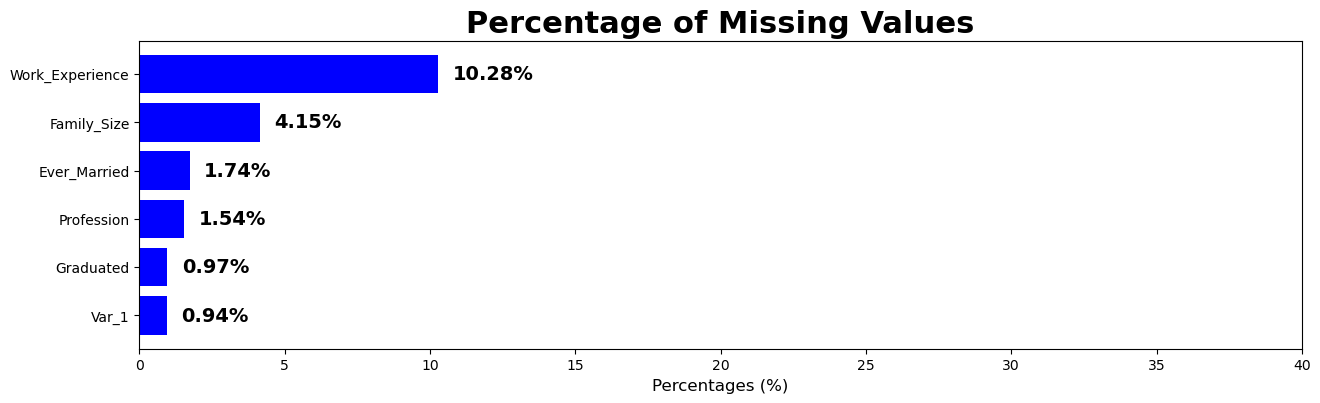

In [8]:
missing_data = train_data.isnull().sum()
missing_percent= (missing_data[missing_data > 0]/train_data.shape[0])*100

# Prepare values
missing_percent.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percent.index, missing_percent, color='blue')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percent, missing_percent.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=14, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=12)
plt.show()


In [9]:
# Filling missing values for categorical columns using mode (most frequent value)
categorical_cols = ['Ever_Married', 'Graduated', 'Profession', 'Var_1']
for col in categorical_cols:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)  # Mode is useful for categorical values

# Filling missing values for numerical columns using median
numerical_cols = ['Work_Experience', 'Family_Size']
for col in numerical_cols:
    train_data[col].fillna(train_data[col].median(), inplace=True)  # Median prevents skewing
# Checking if all missing values are handled
print(train_data.isnull().sum())  # Should return all zeros

# Display the first few rows to confirm the imputation
print(train_data.head())

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64
   Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0    Male           No   22        No     Healthcare              1.0   
1  Female          Yes   38       Yes       Engineer              1.0   
2  Female          Yes   67       Yes       Engineer              1.0   
3    Male          Yes   67       Yes         Lawyer              0.0   
4  Female          Yes   40       Yes  Entertainment              1.0   

  Spending_Score  Family_Size  Var_1  
0            Low          4.0  Cat_4  
1        Average          3.0  Cat_4  
2            Low          1.0  Cat_6  
3           High          2.0  Cat_6  
4           High          6.0  Cat_6  


In [10]:
# Resetting Index
train_data = train_data.reset_index()
train_data = train_data.drop("index", axis="columns")
train_data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6


In [11]:
test_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [13]:
# Dropping the columns
test_data = test_data.drop(["ID"], axis="columns")
test_data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [14]:
test_data.describe()

,Age,Work_Experience,Family_Size
count,2627.000000,2358.000000,2514.000000
mean,43.649791,2.552587,2.825378
std,16.967015,3.341094,1.551906
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,41.000000,1.000000,2.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


In [15]:
test_data.describe(include="object").T

,count,unique,top,freq
Gender,2627,2,Male,1424
Ever_Married,2577,2,Yes,1520
Graduated,2603,2,Yes,1602
Profession,2589,9,Artist,802
Spending_Score,2627,3,Low,1616
Var_1,2595,7,Cat_6,1672


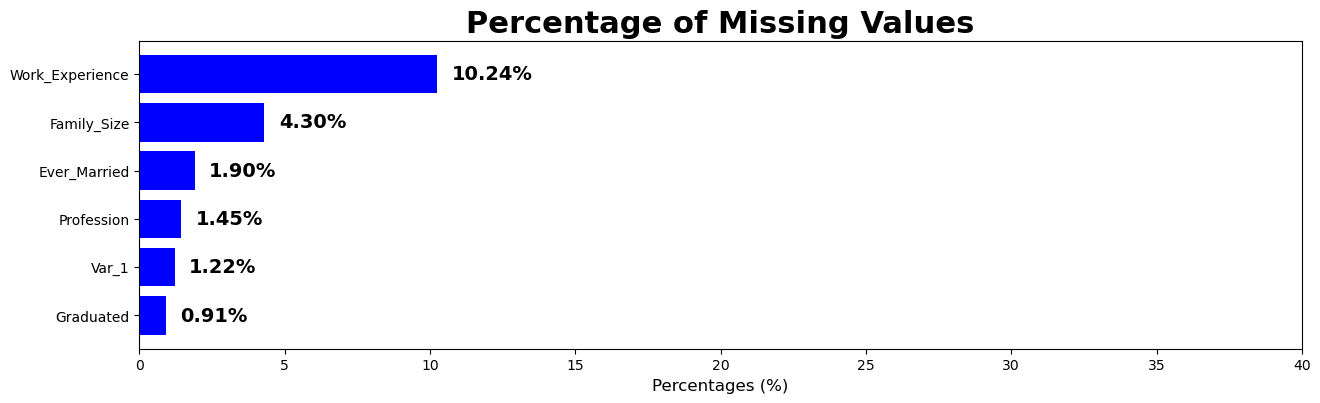

In [16]:
missing_data = test_data.isnull().sum()
missing_percent= (missing_data[missing_data > 0]/test_data.shape[0])*100

# Prepare values
missing_percent.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percent.index, missing_percent, color='blue')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percent, missing_percent.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=14, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=12)
plt.show()


In [17]:
# Filling missing values for categorical columns using mode (most frequent value)
categorical_cols = ['Ever_Married', 'Graduated', 'Profession', 'Var_1']
for col in categorical_cols:
    test_data[col].fillna(test_data[col].mode()[0], inplace=True)  # Mode is useful for categorical values

# Filling missing values for numerical columns using median
numerical_cols = ['Work_Experience', 'Family_Size']
for col in numerical_cols:
    test_data[col].fillna(test_data[col].median(), inplace=True)  # Median prevents skewing
# Checking if all missing values are handled
print(test_data.isnull().sum())  # Should return all zeros

# Display the first few rows to confirm the imputation
print(test_data.head())

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64
   Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0  Female          Yes   36       Yes    Engineer              0.0   
1    Male          Yes   37       Yes  Healthcare              8.0   
2  Female          Yes   69        No      Artist              0.0   
3    Male          Yes   59        No   Executive             11.0   
4  Female           No   19        No   Marketing              1.0   

  Spending_Score  Family_Size  Var_1  
0            Low          1.0  Cat_6  
1        Average          4.0  Cat_6  
2            Low          1.0  Cat_6  
3           High          2.0  Cat_6  
4            Low          4.0  Cat_6  


### Label Encoding

In [18]:
train_new = pd.get_dummies(train_data)
train_new.head()

,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,22,1.0,4.0,False,True,True,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
1,38,1.0,3.0,True,False,False,True,False,True,False,...,True,False,False,False,False,False,True,False,False,False
2,67,1.0,1.0,True,False,False,True,False,True,False,...,False,False,True,False,False,False,False,False,True,False
3,67,0.0,2.0,False,True,False,True,False,True,False,...,False,True,False,False,False,False,False,False,True,False
4,40,1.0,6.0,True,False,False,True,False,True,False,...,False,True,False,False,False,False,False,False,True,False


In [19]:
train_kmeans = pd.get_dummies(train_data, drop_first=True)
train_kmeans.head()

,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,...,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,22,1.0,4.0,True,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1,38,1.0,3.0,False,True,True,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,67,1.0,1.0,False,True,True,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
3,67,0.0,2.0,True,True,True,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False
4,40,1.0,6.0,False,True,True,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False


In [20]:
test_new = pd.get_dummies(test_data)
test_new.head()

,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,36,0.0,1.0,True,False,False,True,False,True,False,...,False,False,True,False,False,False,False,False,True,False
1,37,8.0,4.0,False,True,False,True,False,True,False,...,True,False,False,False,False,False,False,False,True,False
2,69,0.0,1.0,True,False,False,True,True,False,True,...,False,False,True,False,False,False,False,False,True,False
3,59,11.0,2.0,False,True,False,True,True,False,False,...,False,True,False,False,False,False,False,False,True,False
4,19,1.0,4.0,True,False,True,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False


In [21]:
test_kmeans = pd.get_dummies(test_data, drop_first=True)
test_kmeans.head()

,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,...,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,36,0.0,1.0,False,True,True,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
1,37,8.0,4.0,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,69,0.0,1.0,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3,59,11.0,2.0,True,True,False,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
4,19,1.0,4.0,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,True,False


### Feature Scaling - Standardization

In [22]:
# Scale numerical features
scaler = StandardScaler()
scaled_train = scaler.fit_transform(train_kmeans)
scaled_test = scaler.fit_transform(test_kmeans)

In [25]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3)
train_clusters = kmeans_model.fit_predict(train_kmeans)
# Fix: Use train_clusters instead of clusters
train_kmeans.insert(train_kmeans.columns.get_loc("Age"), "Cluster", train_clusters)
train_kmeans.head(3)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Cluster,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,...,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,22,1.0,4.0,True,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1,2,38,1.0,3.0,False,True,True,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2,0,67,1.0,1.0,False,True,True,False,True,False,...,False,False,False,True,False,False,False,False,True,False


In [26]:
train_kmeans.Cluster.unique()

array([1, 2, 0], dtype=int32)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412:

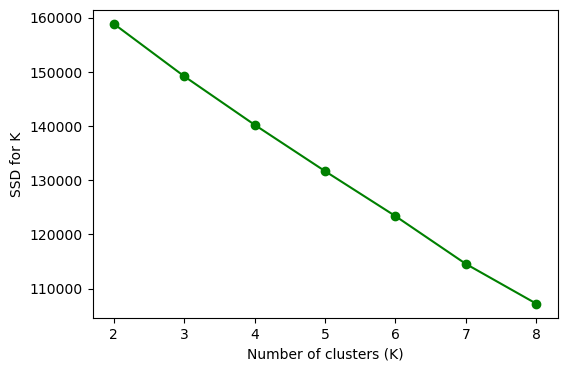

In [36]:
ssd = []
for k in range(2, 9):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(scaled_train)
    ssd.append(kmeans_model.inertia_)
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(range(2, 9), ssd, color="green", marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("SSD for K")
plt.show()

In [28]:
from sklearn.cluster import KMeans

# Train K-Means model on the scaled training data
kmeans_model = KMeans(n_clusters=3, random_state=42)
train_clusters = kmeans_model.fit_predict(scaled_train)

# Add cluster labels to train dataset
train_new.insert(train_new.columns.get_loc("Age"), "Cluster", train_clusters)

# Now, apply the trained model to the test set (DO NOT FIT AGAIN)
test_clusters = kmeans_model.predict(scaled_test)

# Add cluster labels to test dataset
test_new.insert(test_new.columns.get_loc("Age"), "Cluster", test_clusters)

# Preview results
train_new.head(3), test_new.head(3)


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(   Cluster  Age  Work_Experience  Family_Size  Gender_Female  Gender_Male  \
 0        0   22              1.0          4.0          False         True   
 1        2   38              1.0          3.0           True        False   
 2        2   67              1.0          1.0           True        False   
 
    Ever_Married_No  Ever_Married_Yes  Graduated_No  Graduated_Yes  ...  \
 0             True             False          True          False  ...   
 1            False              True         False           True  ...   
 2            False              True         False           True  ...   
 
    Spending_Score_Average  Spending_Score_High  Spending_Score_Low  \
 0                   False                False                True   
 1                    True                False               False   
 2                   False                False                True   
 
    Var_1_Cat_1  Var_1_Cat_2  Var_1_Cat_3  Var_1_Cat_4  Var_1_Cat_5  \
 0        False        Fals

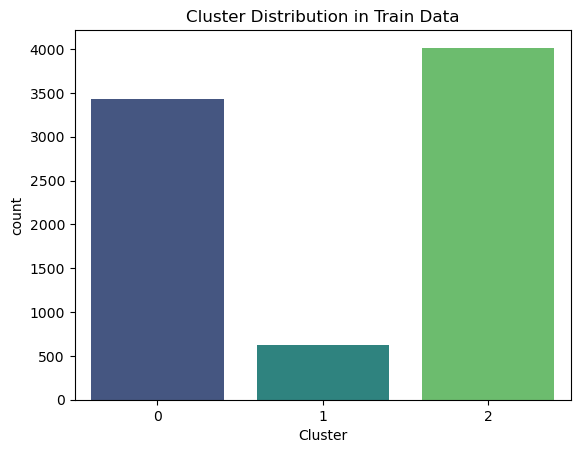

               Age  Work_Experience  Family_Size  Gender_Female  Gender_Male  \
Cluster                                                                        
0        31.715701         2.881154     3.001165       0.518206     0.481794   
1        75.464516         1.191935     1.975806       0.490323     0.509677   
2        48.573599         2.321793     2.868493       0.390535     0.609465   

         Ever_Married_No  Ever_Married_Yes  Graduated_No  Graduated_Yes  \
Cluster                                                                   
0               0.944072          0.055928      0.496941       0.503059   
1               0.061290          0.938710      0.366129       0.633871   
2               0.001494          0.998506      0.271233       0.728767   

         Profession_Artist  ...  Spending_Score_Average  Spending_Score_High  \
Cluster                     ...                                                
0                 0.226041  ...                0.001165        

In [32]:
# Check cluster distribution
sns.countplot(x=train_new['Cluster'], palette='viridis')
plt.title("Cluster Distribution in Train Data")
plt.show()

# Summary statistics per cluster
cluster_summary = train_new.groupby('Cluster').mean()
print(cluster_summary)


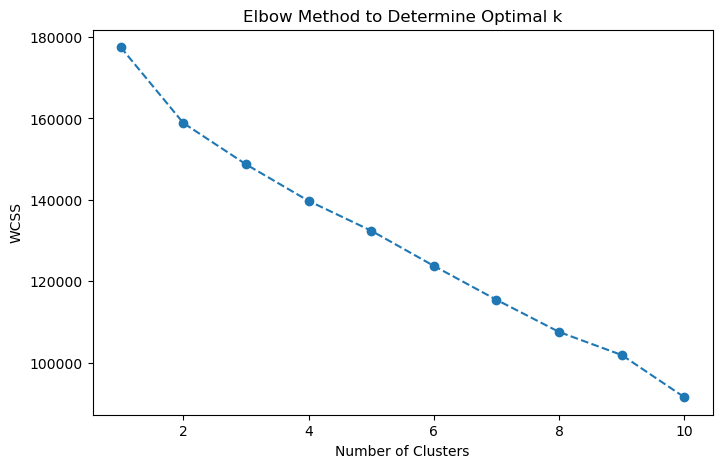

In [34]:
wcss = []  # Within-cluster sum of squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_train)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal k')
plt.show()
